In [1]:
%load_ext autoreload
%autoreload 2
import sys
from gratin.simulation.diffusion_models import generators, params_sampler
from gratin.simulation.traj_tools import get_traj_scale
import matplotlib.pyplot as plt
import numpy as np

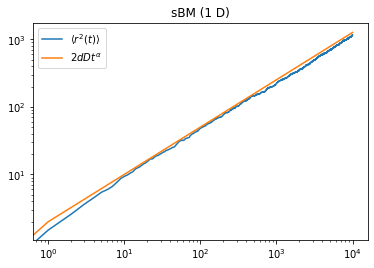

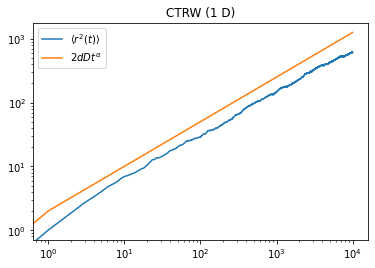

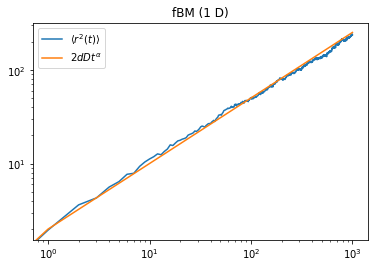

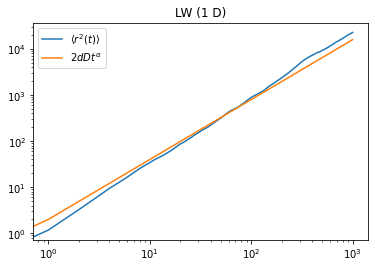

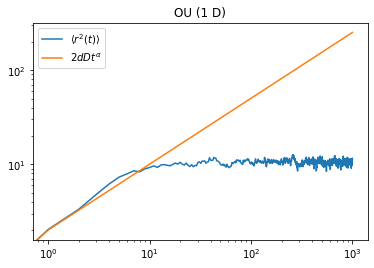

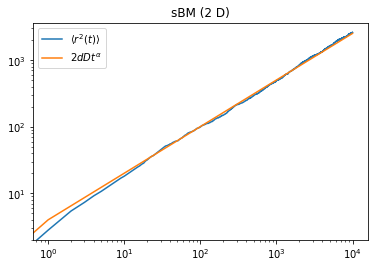

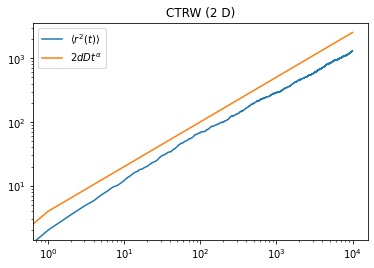

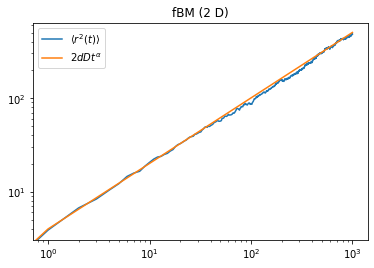

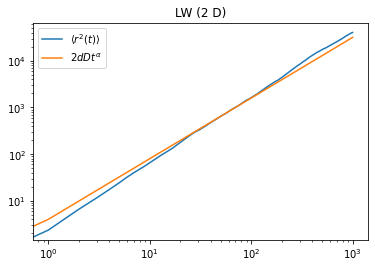

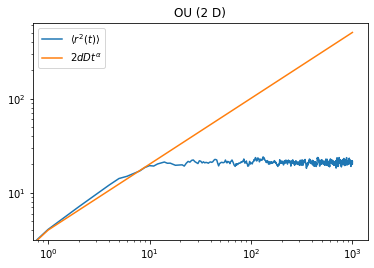

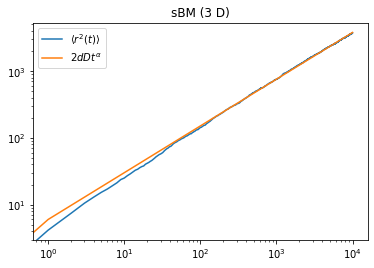

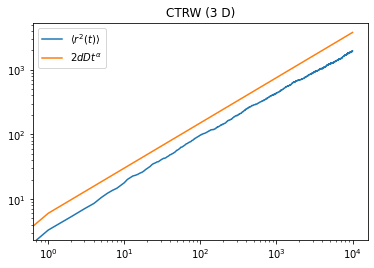

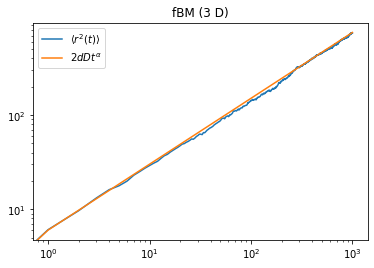

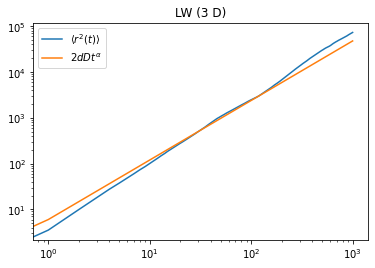

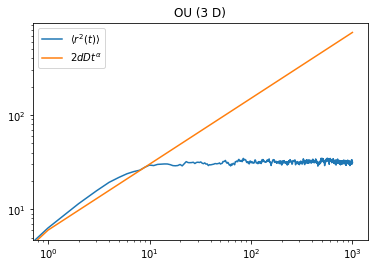

In [6]:
# CTRW suit une pente bizarre au début
for dim in [1,2,3]:
    for model in ["sBM","CTRW","fBM","LW","OU"]:
        n_trajs = 500

        L = 1000
        if model in ["CTRW","sBM"]: L*=10
        D = 1.
        pos = np.zeros((n_trajs,L,dim))
        a = 1.3 if model == "LW" else .7
        args = {}
        if model != "OU":
            args["alpha"] = a
        else:
            args = {"log_theta": -1., "sigma": 1.0}
        for i in range(n_trajs):
            pos[i] = generators[dim][model](T=L,**args)
        plt.figure()
        plt.title("%s (%d D)" % (model,dim))
        plt.plot(np.mean(np.sum(pos**2,axis=-1),axis=0),label="$\langle r^2 (t) \\rangle$")
        plt.plot(2*D*dim*np.power(np.arange(L),a),label="$2dDt ^{\\alpha}$")
        plt.legend()
        plt.xscale("log")
        plt.yscale("log")